In [6]:
import numpy as np
import pandas as pd

# Load the data into a dataframe

In [137]:
ratings_column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_rating = pd.read_csv('./movie-lens-latest-dataset/ratings.csv')

In [138]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993)


In [139]:
movies_column_names = ['item_id', 'titles', 'genres']
df_movie_titles = pd.read_csv('./movie-lens-latest-dataset/movies.csv')

In [140]:
df_movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [141]:
df_movie_titles = df_movie_titles[['movieId','title']]
df_movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [142]:
df = pd.merge(df_rating, df_movie_titles,on='movieId')

In [143]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993)


In [144]:
df.index

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            27753434, 27753435, 27753436, 27753437, 27753438, 27753439,
            27753440, 27753441, 27753442, 27753443],
           dtype='int64', length=27753444)

# Exploration of the data

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('white')
%matplotlib inline

# Create 2  dataframes with average rating and number of ratings for a movie

In [53]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Faintheart (2008)                 5.0
White Tiger (1996)                5.0
Radio Unnameable (2012)           5.0
Rafter Romance (1933)             5.0
Who Killed Chea Vichea? (2010)    5.0
Name: rating, dtype: float64

# This dataframe of average ratings looks suspicious. 
Can these movies truly have a 5 star rating?
If there was only one user who rated these movies with a 5 star rating,
we need to be cautious of these records.

To handle this we can get the count of ratings for each movie

In [54]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    97999
Forrest Gump (1994)                 97040
Pulp Fiction (1994)                 92406
Silence of the Lambs, The (1991)    87899
Matrix, The (1999)                  84545
Name: rating, dtype: int64

# This looks better!
Popular movies should have higher number of user rating.
We can now combine information about the average rating and number of ratings in a dataframe called ratings

In [152]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.head()

,rating
title,
Faintheart (2008),5.0
White Tiger (1996),5.0
Radio Unnameable (2012),5.0
Rafter Romance (1933),5.0
Who Killed Chea Vichea? (2010),5.0


In [154]:
ratings['rating_count'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_count
title,,
Faintheart (2008),5.0,1
White Tiger (1996),5.0,1
Radio Unnameable (2012),5.0,1
Rafter Romance (1933),5.0,1
Who Killed Chea Vichea? (2010),5.0,2


In [69]:
ratings.index

Index(['Faintheart (2008)', 'White Tiger (1996)', 'Radio Unnameable (2012)',
       'Rafter Romance (1933)', 'Who Killed Chea Vichea? (2010)',
       'Gesuzza, La Sposa Garibaldina (1934)', 'Ram Dass: Fierce Grace (2001)',
       'Ramen Shop (2018)', 'Ramona (1936)', 'Absolutely Fabulous (2001)',
       ...
       'These Old Broads (2001)', 'Abduction', 'Chillers (1987)',
       'Whoregasm (1988)', '40 Days and Nights (2012)',
       'Raggedy Ann and Raggedy Andy in the Pumpkin Who Couldn't Smile (1979)',
       'Get2Gether, A (2005)', 'María de mi corazón (1979)',
       'Keep Off My Grass! (1975)', 'Back in the Day (2005)'],
      dtype='object', name='title', length=53817)

# And looks like the suspicion was true! These movies did in fact have only 1 or 2 reviews in contrast to the thousands of reviews for Forrest Gump (1994)
A couple of statistical insights now, shall we?

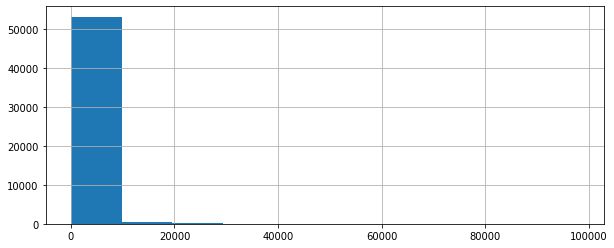

In [67]:
plt.figure(figsize=(10,4))
ratings['rating_count'].hist(bins=10)

Looks like most (10,000) movies have around 55,000 ratings.
Maybe we should consider only those movies in the recommendation system close to that amount of ratings.

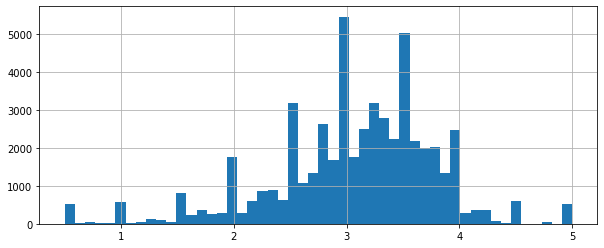

In [76]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

Seems as if most users have given ratings between 3 and 4.
This distribution of movie ratings seems like a Normal Distribution, eh?

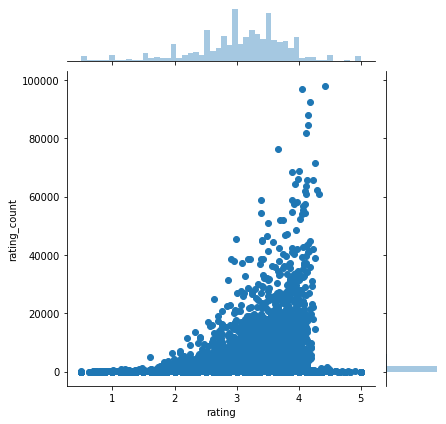

In [78]:
sns.jointplot(x='rating', y='rating_count', data=ratings)

# Great, we know what our dataset is made of! Time to build a recommendation system!

This is a dataframe made from 'df', to resemble a matrix with movies as columns and user IDs as rows. We'll consider only those movies which have been rated more than 10,000 times.

In [171]:
df.shape

(27753444, 5)

In [170]:
ratings.shape

(53817, 2)

In [227]:
ratings_filtered = ratings[ratings.rating_count>1000]
movies_filtered = list(ratings_filtered.index)

In [225]:
df_filtered = df[df['title'].isin( movies_filtered )].dropna()
df_filtered.head()

,userId,movieId,rating,timestamp,title
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993)


In [226]:
df_filtered.shape

(24902424, 5)

In [228]:
matrix = df_filtered.pivot_table(index='userId', columns='title',values='rating')
matrix.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),...,Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.5,NaN,3.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


get the movies with most number of reviews

In [230]:
ratings.sort_values('rating_count',ascending=False).head(10)

,rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.424188,97999
Forrest Gump (1994),4.056585,97040
Pulp Fiction (1994),4.173971,92406
"Silence of the Lambs, The (1991)",4.151412,87899
"Matrix, The (1999)",4.149695,84545
Star Wars: Episode IV - A New Hope (1977),4.120455,81815
Jurassic Park (1993),3.665034,76451
Schindler's List (1993),4.257502,71516
Braveheart (1995),4.008481,68803


Let's get the user movie ratings for Shawshank Redemption & Toy Story

In [231]:
Shaw_Redemp_ratings = matrix['Shawshank Redemption, The (1994)']
Toy_Story_ratings = matrix['Toy Story (1995)']
Shaw_Redemp_ratings.head()

userId
1    NaN
2    NaN
3    NaN
4    5.0
5    5.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [233]:
type(Shaw_Redemp_ratings)

pandas.core.series.Series

Use the corrwith() method to get correlation between 2 dataframes

In [235]:
similar_to_Shaw_Redemp = matrix.corrwith(Shaw_Redemp_ratings)

In [236]:
type(similar_to_Shaw_Redemp)

pandas.core.series.Series

In [237]:
similar_to_Toy_Story = matrix.corrwith(Toy_Story_ratings)

In [239]:
corr_Shaw_Redemp = pd.DataFrame(similar_to_Shaw_Redemp, columns=['correlation'])
corr_Shaw_Redemp.dropna()
corr_Shaw_Redemp.head()

,correlation
title,
"'burbs, The (1989)",0.100257
(500) Days of Summer (2009),0.225602
*batteries not included (1987),0.178168
...And Justice for All (1979),0.220664
10 Cloverfield Lane (2016),0.142914


In [240]:
corr_Shaw_Redemp.sort_values('correlation',ascending=False).head()

,correlation
title,
"Shawshank Redemption, The (1994)",1.000000
Voices from the List (2004),0.458097
"Green Mile, The (1999)",0.419568
Schindler's List (1993),0.388692
Intouchables (2011),0.380028


In [243]:
corr_Toy_Story = pd.DataFrame(similar_to_Toy_Story, columns=['correlation'])
corr_Toy_Story.dropna()
corr_Toy_Story.sort_values('correlation',ascending=False).head()

,correlation
title,
Toy Story (1995),1.000000
Toy Story 2 (1999),0.749706
Toy Story 3 (2010),0.691276
"Monsters, Inc. (2001)",0.556768
"Bug's Life, A (1998)",0.532691


In [ ]:
Isn't this great! The recommendation system suggested the sequels to Toy Story!